In [48]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.preprocessing import LabelEncoder

In [49]:
df = pd.read_csv('csv/gameandgrade.csv')

In [50]:
X = df[["Playing Years"]]
Y = df["Grade"]

In [51]:
ordinal_columns = ["School Code", "Sex", "Father Education", "Mother Education", "Playing Often"]
encoder = LabelEncoder()

for col in ordinal_columns:
    df[col] = encoder.fit_transform(df[col])

In [52]:
df = pd.get_dummies(df, columns=["School Code", "Sex", "Father Education", "Mother Education", "Playing Often"], drop_first=True)

In [53]:

X = df.drop(columns=["Grade"]) 
Y = df["Grade"]


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [55]:
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [56]:
print(f"Intercept (b): {model.intercept_:.2f}")

Intercept (b): 86.56


In [57]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                    Coefficient
Playing Years          0.666427
Playing Hours         -0.147458
Playing Games        -30.615734
Parent Revenue         2.227140
School Code_1         -0.287079
School Code_2         -5.580186
School Code_3         -0.648881
School Code_4         13.441014
School Code_5         17.078530
School Code_6         23.996221
School Code_7          3.351294
School Code_8         20.431145
School Code_9          1.197162
School Code_10         3.275336
Sex_1                 -3.454682
Father Education_1    -5.898767
Father Education_2   -12.030919
Father Education_3   -13.582701
Father Education_4   -11.055577
Father Education_5    -9.597235
Father Education_6    -4.806350
Mother Education_1    -7.845260
Mother Education_2    -3.570091
Mother Education_3    -2.992395
Mother Education_4    -0.433139
Mother Education_5     1.119199
Mother Education_6     0.873939
Playing Often_1       22.439733
Playing Often_2       26.707412
Playing Often_3       25.545822
Playing 

In [58]:
Y_pred = model.predict(X_test)

In [59]:
def clean_data(df):
    df_clean = df.copy()


In [60]:
print(f"Original DataFrame shape: {df.shape}")


Original DataFrame shape: (770, 33)


In [61]:
print(df.head())
print(df.dtypes)

   Playing Years  Playing Hours  Playing Games  Parent Revenue  Grade  \
0              1              1              1               4  77.50   
1              1              1              1               1  83.00   
2              0              0              0               1  80.00   
3              3              1              1               2  45.00   
4              1              2              1               1  85.00   

   School Code_1  School Code_2  School Code_3  School Code_4  School Code_5  \
0          False          False          False          False          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False          False          False          False          False   

   ...  Mother Education_2  Mother Education_3  Mother Education_4  \
0  ...    

In [62]:
df = df.replace('92..00', '92.00')


In [63]:
for column in df.columns:
    if df[column].dtype == 'object': 
        df[column] = df[column].astype(str).str.replace('..', '.', regex=False)


In [64]:
for column in df.columns:
    try:
        # Try to convert to numeric, forcing errors to become NaN
        df[column] = pd.to_numeric(df[column], errors='coerce')
    except:
        # If conversion fails, the column might be categorical, so we'll leave it as is
        pass


In [65]:
print(f"NaN values after conversion: {df.isna().sum().sum()}")
if df.isna().sum().sum() > 0:

    df = df.dropna()
    print(f"Shape after dropping NaN rows: {df.shape}")

NaN values after conversion: 0


In [66]:
X = df.drop(columns=["Grade"]) 
Y = df["Grade"]  

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [68]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [69]:
Y_pred = model.predict(X_test)

In [70]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [71]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 169.80
R² Score: 0.45


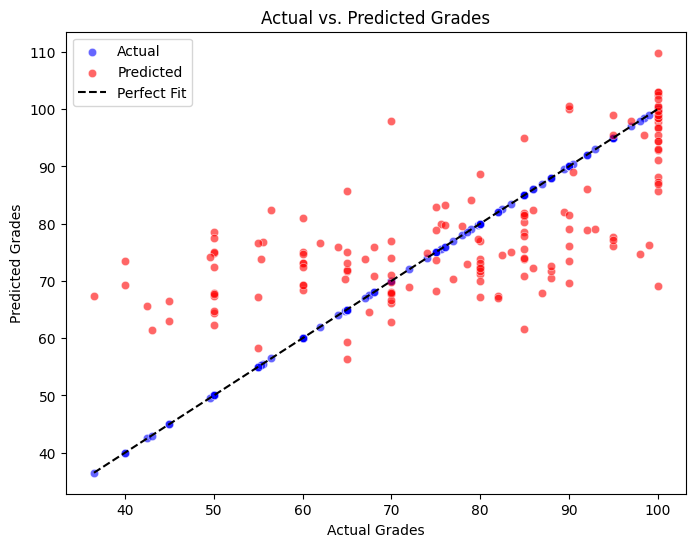

In [72]:
# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test.values.flatten(), y=Y_test.values.flatten(), color="blue", label="Actual", alpha=0.6)  # Actual values
sns.scatterplot(x=Y_test.values.flatten(), y=Y_pred.flatten(), color="red", label="Predicted", alpha=0.6)  # Predicted values

# Plot a reference diagonal line (perfect predictions)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color="black", linestyle="--", label="Perfect Fit")

# Labels, title, and legend
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs. Predicted Grades")
plt.legend()
plt.show()

In [73]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)
print(coefficients)

                    Coefficient
Playing Often_5       28.958500
Playing Often_4       28.202418
Playing Often_2       26.707412
Playing Often_3       25.545822
School Code_6         23.996221
Playing Often_1       22.439733
School Code_8         20.431145
School Code_5         17.078530
School Code_4         13.441014
School Code_7          3.351294
School Code_10         3.275336
Parent Revenue         2.227140
School Code_9          1.197162
Mother Education_5     1.119199
Mother Education_6     0.873939
Playing Years          0.666427
Playing Hours         -0.147458
School Code_1         -0.287079
Mother Education_4    -0.433139
School Code_3         -0.648881
Mother Education_3    -2.992395
Sex_1                 -3.454682
Mother Education_2    -3.570091
Father Education_6    -4.806350
School Code_2         -5.580186
Father Education_1    -5.898767
Mother Education_1    -7.845260
Father Education_5    -9.597235
Father Education_4   -11.055577
Father Education_2   -12.030919
Father E

In [74]:
r2_train = r2_score(Y_train, model.predict(X_train))
r2_test = r2_score(Y_test, Y_pred)

print(f"R² Score on Training Data: {r2_train:.4f}")
print(f"R² Score on Test Data: {r2_test:.4f}")

R² Score on Training Data: 0.3749
R² Score on Test Data: 0.4491
